**SERB - Karyashala sponsored one week workshop on Explainable AI: Theoretical Insights and Engineering Applications**

**Hands-on-Explainable-AI-using-LIME-Library**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=62a32c589c76aa01542e3bbc5c38ba45c866806af3b9d7be57d30e5550f66857
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import lime
import matplotlib.pyplot as plt
data_URL = "https://raw.githubusercontent.com/keitazoumana/Experimentation-Data/main/diabetes.csv"
diabetes_data = pd.read_csv(data_URL)
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
# separate features and target variables
X = diabetes_data.drop(columns ='Outcome')
y = diabetes_data['Outcome']

In [ ]:
#Create train & test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=13)

In [ ]:
#Build the model
rf_clf = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_features=2)

In [ ]:
#Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       165
           1       0.62      0.76      0.68        66

    accuracy                           0.80       231
   macro avg       0.76      0.78      0.77       231
weighted avg       0.81      0.80      0.80       231



In [ ]:
#import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer


In [ ]:
#Get the class names
class_names = ['Has diabetes', 'No diabetes']

In [ ]:
# Get the features names
feature_names = list(X_train.columns)

In [ ]:
# Fit the explainer on training dataset using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values,feature_names=feature_names,class_names = class_names, mode ='classification')



explanation = explainer.explain_instance(X_test.iloc[8],rf_clf.predict_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# print the nicely formatted explanation
print("Lime Explanation:")
for feature, weight in explanation.as_list():
  print(f"{feature:<10}{weight:.4f}")


Lime Explanation:
99.00 < Glucose <= 116.00-0.1157
29.00 < Age <= 40.000.0895
Pregnancies > 6.000.0653
70.00 < BloodPressure <= 80.00-0.0256
27.60 < BMI <= 32.400.0229
SkinThickness <= 0.00-0.0066
0.39 < DiabetesPedigreeFunction <= 0.650.0035
Insulin <= 0.00-0.0034


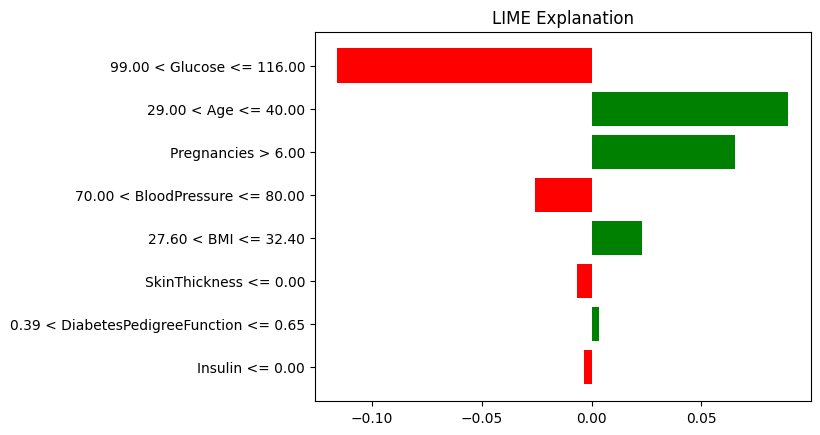

In [ ]:
# Plot the explanation
fig = explanation.as_pyplot_figure()
plt.title("LIME Explanation")
#plt.xlabel("Feature Importance")
plt.show()
fig.savefig("lime_explanation.png")


In [ ]:
#Session completed
# Rahul Kumar
# M.tech in AI